<a href="https://colab.research.google.com/github/shashikumar1998/Crop-Yield-Predition/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from fast_ml.model_development import train_valid_test_split
from itertools import product
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import TimeSeriesSplit
from itertools import product
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
import statsmodels
print(statsmodels.__version__)


0.14.0


In [ ]:
!pip install fast_ml --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 764.9 kB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/GWAR_datasets/transformed_pc.csv')
del df[df.columns[0]]


,crop_flow_lb_s,datetime,field,city_name,product_Corn,product_Soybeans,product_Wheat,PC1,PC2,PC3,PC4,PC5,PC6,PC7,month,year
0,0.00,2009-10-16 14:00:00,F1: T2R2-West,Ross Township,0,1,0,3.781658,1.597206,-0.231569,0.327539,-0.422582,0.499634,-0.862528,10,2009
1,4.80,2009-10-16 14:00:00,F1: T2R2-West,Ross Township,0,1,0,3.713158,1.502763,-0.156346,0.495098,-0.623663,0.532004,-0.868154,10,2009
2,4.68,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.872774,1.673078,-0.514877,0.147105,-0.545803,1.158249,-0.604078,10,2009
3,3.98,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.875117,1.675503,-0.520415,0.142061,-0.545247,1.168495,-0.599825,10,2009
4,2.98,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.894926,1.694252,-0.573709,0.100911,-0.554342,1.279905,-0.555002,10,2009


In [ ]:
df.sort_values(by='datetime', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350445 entries, 126490 to 147171
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   crop_flow_lb_s    350445 non-null  float64
 1   datetime          350445 non-null  object 
 2   field             350445 non-null  object 
 3   city_name         350445 non-null  object 
 4   product_Corn      350445 non-null  int64  
 5   product_Soybeans  350445 non-null  int64  
 6   product_Wheat     350445 non-null  int64  
 7   PC1               350445 non-null  float64
 8   PC2               350445 non-null  float64
 9   PC3               350445 non-null  float64
 10  PC4               350445 non-null  float64
 11  PC5               350445 non-null  float64
 12  PC6               350445 non-null  float64
 13  PC7               350445 non-null  float64
 14  month             350445 non-null  int64  
 15  year              350445 non-null  int64  
dtypes: float64(8), 

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['datetime'] = df['datetime'].dt.date

df.set_index('datetime', inplace=True)





In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

# Assuming 'df' has a 'crop_flow_lb_s' target variable and 'datetime' column in seconds
model = ARIMA(train_data['crop_flow_lb_s'], order=(1, 1, 1))  # Adjust p, d, q as needed
results = model.fit()

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true),len(y_train_pred))
# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true),len(y_test_pred))


280356 280356
35044 35044


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(8, 1, 3))  # Adjust p, d, q as needed
results = model.fit()
aic = results.aic

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))
# Predict on val set
y_val_true = val_data['crop_flow_lb_s']
y_val_pred = results.predict(start=int(len(df)*0.9), end=len(df)-1, typ='levels')
print(len(y_val_true), len(y_val_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
test_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_test = np.mean(test_data['crop_flow_lb_s'])
tss_test = np.sum((test_data['crop_flow_lb_s'] - mean_y_test) ** 2)
rss_test = np.sum(test_residuals ** 2)
r2_like_test = 1 - (rss_test / tss_test)

# Calculate MSE, RMSE, MAE, R-squared, and AIC for val set
mse_val = mean_squared_error(y_val_true, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val_true, y_val_pred)
r2_val = 1 - (mse_val / np.var(y_val_true))
val_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_val = np.mean(val_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y_val) ** 2)
rss = np.sum(val_residuals ** 2)
r2_like_val = 1 - (rss / tss)

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, Test R-squared-like Metric: {r2_like_test}, AIC: {aic}')

print(f'Val MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}, Test R-squared: {r2_val}, R-squared-like Metric: {r2_like_val}, AIC: {aic}')


280356 280356
35044 35044
35045 35045
Test MSE: 3.1345698408293745, RMSE: 1.7704716436106438, MAE: 1.4233743835941373, Test R-squared: -0.11119866475055384, Test R-squared-like Metric: -11.644156597393351, AIC: 1214703.4402547367
Val MSE: 7.841589726731075, RMSE: 2.8002838653841997, MAE: 2.3310809076631687, Test R-squared: -0.11706291203589858, R-squared-like Metric: 0.8007441274165912, AIC: 1214703.4402547367


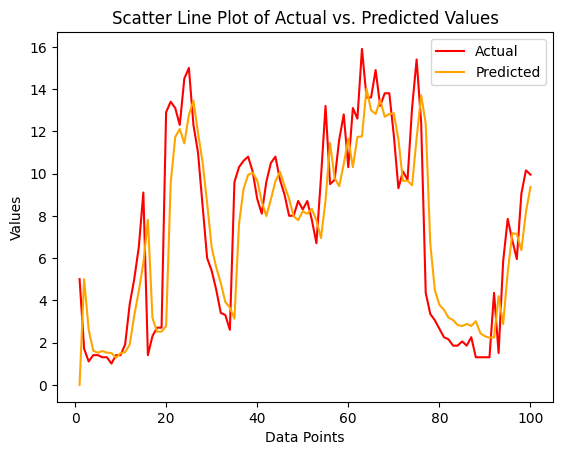

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

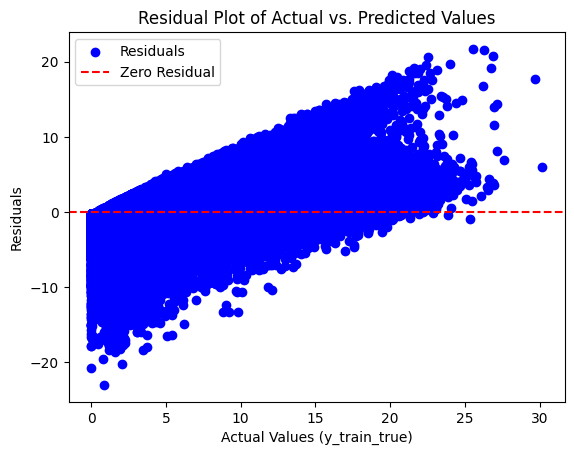

In [ ]:
residuals = [true - pred for true, pred in zip(y_train_true, y_train_pred)]

# Create a residual plot
plt.scatter(y_train_true, residuals, color='blue', label='Residuals')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')

# Add labels and title
plt.xlabel('Actual Values (y_train_true)')
plt.ylabel('Residuals')
plt.title('Residual Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

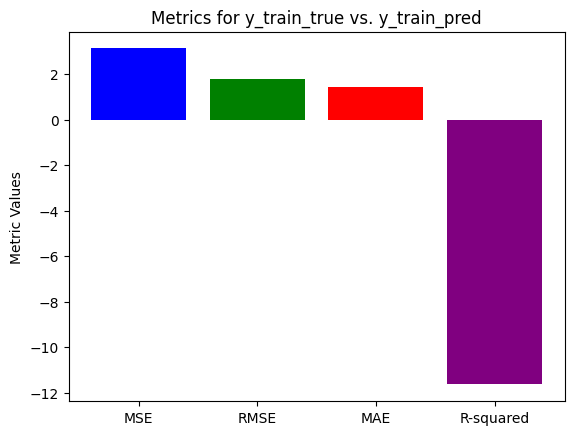

In [ ]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metrics_values = [mse_test, rmse_test, mae_test, r2_like_test]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Values')
plt.title('Metrics for y_train_true vs. y_train_pred')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(1, 1, 1))  # Adjust p, d, q as needed
results = model.fit()
aic = results.aic

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))
# Predict on val set
y_val_true = val_data['crop_flow_lb_s']
y_val_pred = results.predict(start=int(len(df)*0.9), end=len(df)-1, typ='levels')
print(len(y_val_true), len(y_val_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
test_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_test = np.mean(test_data['crop_flow_lb_s'])
tss_test = np.sum((test_data['crop_flow_lb_s'] - mean_y_test) ** 2)
rss_test = np.sum(test_residuals ** 2)
r2_like_test = 1 - (rss / tss)

# Calculate MSE, RMSE, MAE, R-squared, and AIC for val set
mse_val = mean_squared_error(y_val_true, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val_true, y_val_pred)
r2_val = 1 - (mse_val / np.var(y_val_true))
val_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_val = np.mean(val_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y_val) ** 2)
rss = np.sum(val_residuals ** 2)
r2_like_val = 1 - (rss / tss)

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, Test R-squared-like Metric: {r2_like_test}, AIC: {aic}')

print(f'Val MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}, Test R-squared: {r2_val}, R-squared-like Metric: {r2_like_val}, AIC: {aic}')


280356 280356
35044 35044
35045 35045
Test MSE: 8.436795424433932, RMSE: 2.904616226704301, MAE: 2.606170741588772, Test R-squared: -1.9908269033571933, Test R-squared-like Metric: 0.8007441274165912, AIC: 1229199.6930755582
Val MSE: 7.8353167628730755, RMSE: 2.7991635827284327, MAE: 2.4258204866498523, Test R-squared: -0.11616930557107352, R-squared-like Metric: 0.7901579331790747, AIC: 1229199.6930755582


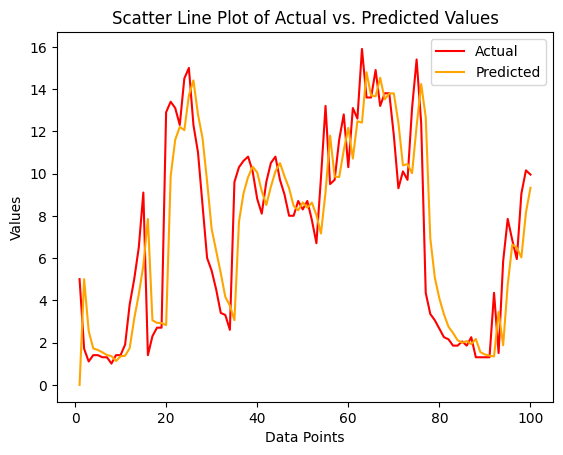

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

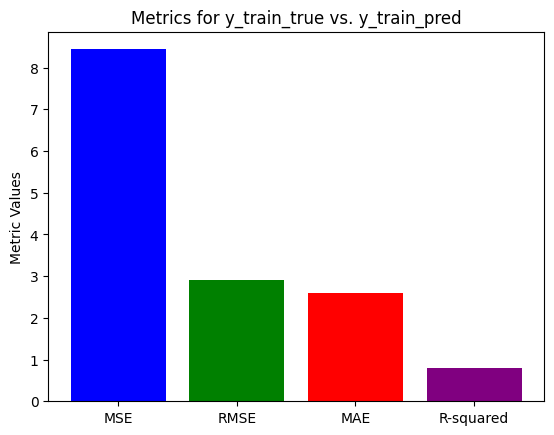

In [ ]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metrics_values = [mse_test, rmse_test, mae_test, r2_like_test]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Values')
plt.title('Metrics for y_train_true vs. y_train_pred')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(2, 1, 1))  # Adjust p, d, q as needed
results = model.fit()
aic = results.aic

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))
# Predict on val set
y_val_true = val_data['crop_flow_lb_s']
y_val_pred = results.predict(start=int(len(df)*0.9), end=len(df)-1, typ='levels')
print(len(y_val_true), len(y_val_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
test_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_test = np.mean(test_data['crop_flow_lb_s'])
tss_test = np.sum((test_data['crop_flow_lb_s'] - mean_y_test) ** 2)
rss_test = np.sum(test_residuals ** 2)
r2_like_test = 1 - (rss / tss)

# Calculate MSE, RMSE, MAE, R-squared, and AIC for val set
mse_val = mean_squared_error(y_val_true, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val_true, y_val_pred)
r2_val = 1 - (mse_val / np.var(y_val_true))
val_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_val = np.mean(val_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y_val) ** 2)
rss = np.sum(val_residuals ** 2)
r2_like_val = 1 - (rss / tss)

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, Test R-squared-like Metric: {r2_like_test}, AIC: {aic}')

print(f'Val MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}, Test R-squared: {r2_val}, R-squared-like Metric: {r2_like_val}, AIC: {aic}')


280356 280356
35044 35044
35045 35045
Test MSE: 3.142476307922216, RMSE: 1.7727031076641728, MAE: 1.4261260822280775, Test R-squared: -0.11400149133365378, Test R-squared-like Metric: 0.7901579331790747, AIC: 1215139.047990571
Val MSE: 7.82894973429576, RMSE: 2.7980260424620353, MAE: 2.3303265342082105, Test R-squared: -0.11526229924564091, R-squared-like Metric: 0.8004229290471115, AIC: 1215139.047990571


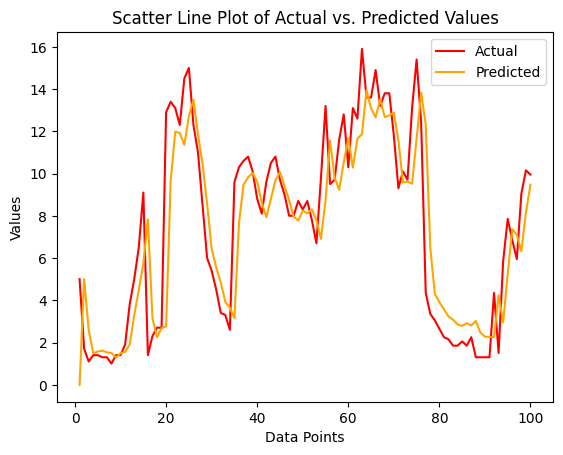

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

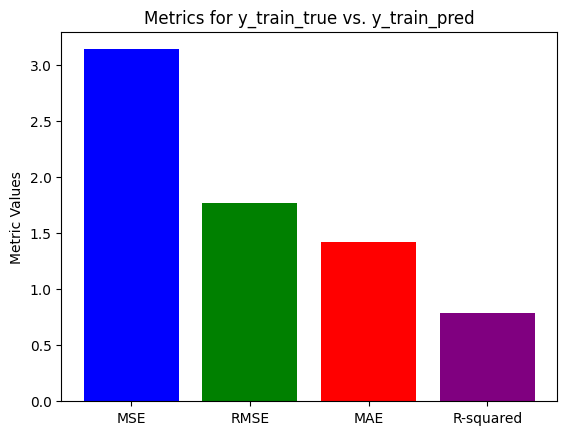

In [ ]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metrics_values = [mse_test, rmse_test, mae_test, r2_like_test]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Values')
plt.title('Metrics for y_train_true vs. y_train_pred')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(3, 1, 1))  # Adjust p, d, q as needed
results = model.fit()
aic = results.aic

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))
# Predict on val set
y_val_true = val_data['crop_flow_lb_s']
y_val_pred = results.predict(start=int(len(df)*0.9), end=len(df)-1, typ='levels')
print(len(y_val_true), len(y_val_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
test_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_test = np.mean(test_data['crop_flow_lb_s'])
tss_test = np.sum((test_data['crop_flow_lb_s'] - mean_y_test) ** 2)
rss_test = np.sum(test_residuals ** 2)
r2_like_test = 1 - (rss / tss)

# Calculate MSE, RMSE, MAE, R-squared, and AIC for val set
mse_val = mean_squared_error(y_val_true, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val_true, y_val_pred)
r2_val = 1 - (mse_val / np.var(y_val_true))
val_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_val = np.mean(val_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y_val) ** 2)
rss = np.sum(val_residuals ** 2)
r2_like_val = 1 - (rss / tss)

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, Test R-squared-like Metric: {r2_like_test}, AIC: {aic}')

print(f'Val MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}, Test R-squared: {r2_val}, R-squared-like Metric: {r2_like_val}, AIC: {aic}')


280356 280356
35044 35044
35045 35045
Test MSE: 3.129001122422764, RMSE: 1.7688982792752002, MAE: 1.4214474942503175, Test R-squared: -0.10922456534552683, Test R-squared-like Metric: 0.8004229290471115, AIC: 1214792.4747314283
Val MSE: 7.850605956759097, RMSE: 2.8018932807584047, MAE: 2.331627023056971, Test R-squared: -0.11834730672137339, R-squared-like Metric: 0.8006708772207636, AIC: 1214792.4747314283


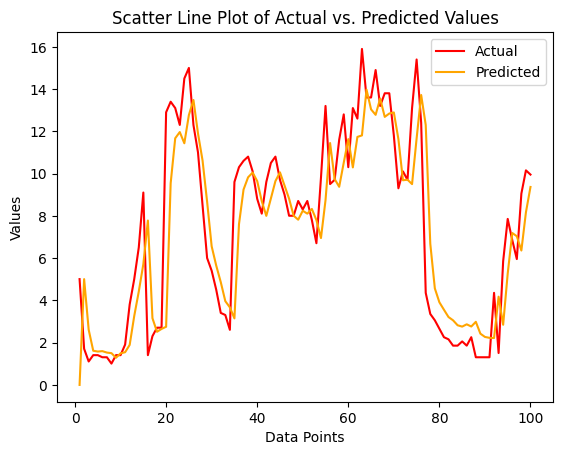

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

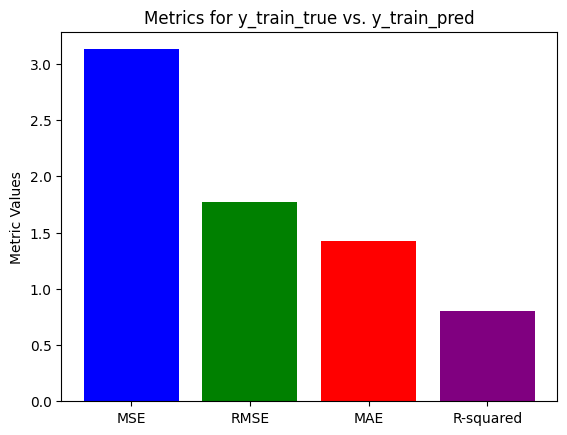

In [ ]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metrics_values = [mse_test, rmse_test, mae_test, r2_like_test]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Values')
plt.title('Metrics for y_train_true vs. y_train_pred')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(4, 1, 2))  # Adjust p, d, q as needed
results = model.fit()
aic = results.aic

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))
# Predict on val set
y_val_true = val_data['crop_flow_lb_s']
y_val_pred = results.predict(start=int(len(df)*0.9), end=len(df)-1, typ='levels')
print(len(y_val_true), len(y_val_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
test_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_test = np.mean(test_data['crop_flow_lb_s'])
tss_test = np.sum((test_data['crop_flow_lb_s'] - mean_y_test) ** 2)
rss_test = np.sum(test_residuals ** 2)
r2_like_test = 1 - (rss / tss)

# Calculate MSE, RMSE, MAE, R-squared, and AIC for val set
mse_val = mean_squared_error(y_val_true, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val_true, y_val_pred)
r2_val = 1 - (mse_val / np.var(y_val_true))
val_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_val = np.mean(val_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y_val) ** 2)
rss = np.sum(val_residuals ** 2)
r2_like_val = 1 - (rss / tss)

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, Test R-squared-like Metric: {r2_like_test}, AIC: {aic}')

print(f'Val MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}, Test R-squared: {r2_val}, R-squared-like Metric: {r2_like_val}, AIC: {aic}')


280356 280356
35044 35044
35045 35045
Test MSE: 3.130232875626139, RMSE: 1.7692464146144649, MAE: 1.4218727742058608, Test R-squared: -0.10966121936326934, Test R-squared-like Metric: 0.7859492628619056, AIC: 1214712.971197481
Val MSE: 7.848598325774131, RMSE: 2.801534994565324, MAE: 2.331505677804144, Test R-squared: -0.11806131240229889, R-squared-like Metric: 0.8007302450843397, AIC: 1214712.971197481


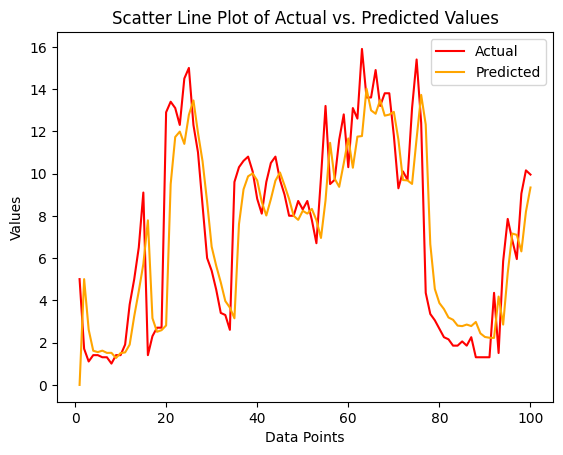

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

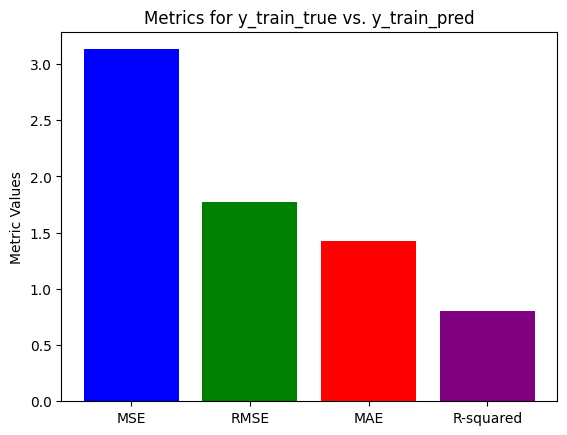

In [ ]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metrics_values = [mse_test, rmse_test, mae_test, r2_like_test]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Values')
plt.title('Metrics for y_train_true vs. y_train_pred')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(8, 1, 3))  # Adjust p, d, q as needed
results = model.fit()
aic = results.aic

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))
# Predict on val set
y_val_true = val_data['crop_flow_lb_s']
y_val_pred = results.predict(start=int(len(df)*0.9), end=len(df)-1, typ='levels')
print(len(y_val_true), len(y_val_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
test_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_test = np.mean(test_data['crop_flow_lb_s'])
tss_test = np.sum((test_data['crop_flow_lb_s'] - mean_y_test) ** 2)
rss_test = np.sum(test_residuals ** 2)
r2_like_test = 1 - (rss / tss)

# Calculate MSE, RMSE, MAE, R-squared, and AIC for val set
mse_val = mean_squared_error(y_val_true, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val_true, y_val_pred)
r2_val = 1 - (mse_val / np.var(y_val_true))
val_residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y_val = np.mean(val_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y_val) ** 2)
rss = np.sum(val_residuals ** 2)
r2_like_val = 1 - (rss / tss)

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, Test R-squared-like Metric: {r2_like_test}, AIC: {aic}')

print(f'Val MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}, Test R-squared: {r2_val}, R-squared-like Metric: {r2_like_val}, AIC: {aic}')


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(2, 1, 1))  # Adjust p, d, q as needed
results = model.fit()

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
aic = results.aic
residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y = np.mean(train_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y) ** 2)
rss = np.sum(residuals ** 2)
r2_like = 1 - (rss / tss)
print(f'R-squared-like Metric: {r2_like}')

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, R-squared-like Metric: {r2_like}, AIC: {aic}')


280356 280356
35044 35044
R-squared-like Metric: 0.7856191514291351
Test MSE: 3.142476307922216, RMSE: 1.7727031076641728, MAE: 1.4261260822280775, Test R-squared: -0.11400149133365378, R-squared-like Metric: 0.7856191514291351, AIC: 1215139.047990571


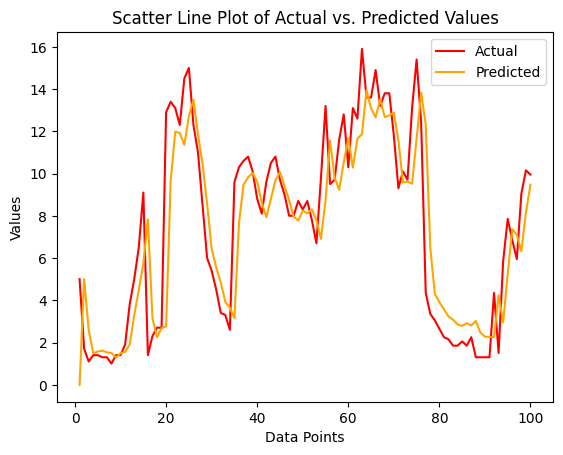

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

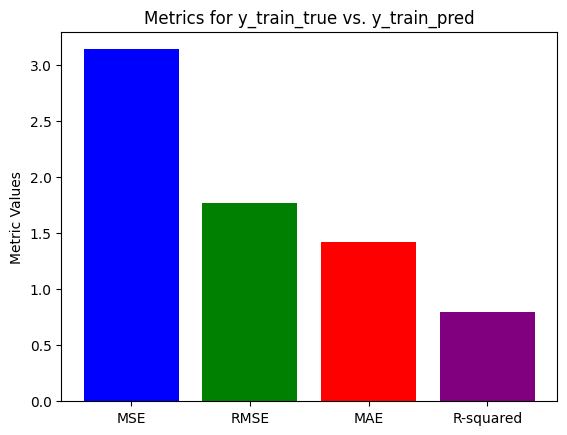

In [ ]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metrics_values = [mse_test, rmse_test, mae_test, r2_like_test]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Values')
plt.title('Metrics for y_train_true vs. y_train_pred')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(2, 1, 0))  # Adjust p, d, q as needed
results = model.fit()

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
aic = results.aic
residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y = np.mean(train_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y) ** 2)
rss = np.sum(residuals ** 2)
r2_like = 1 - (rss / tss)
print(f'R-squared-like Metric: {r2_like}')

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, R-squared-like Metric: {r2_like}, AIC: {aic}')


280356 280356
35044 35044
R-squared-like Metric: 0.7733530911881488
Test MSE: 7.701844064883145, RMSE: 2.775219642637884, MAE: 2.4744780246611313, Test R-squared: -1.7302881338099962, R-squared-like Metric: 0.7733530911881488, AIC: 1230737.3264408899


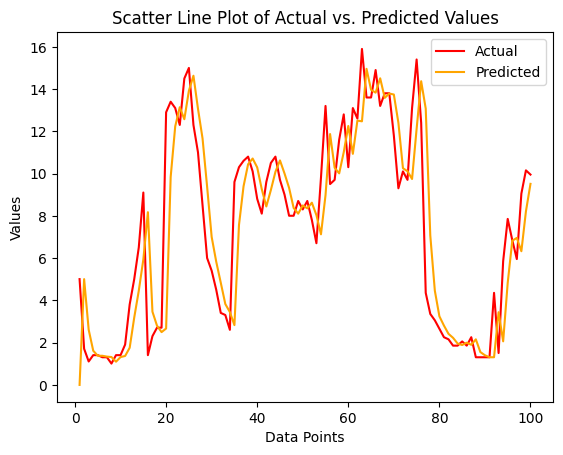

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

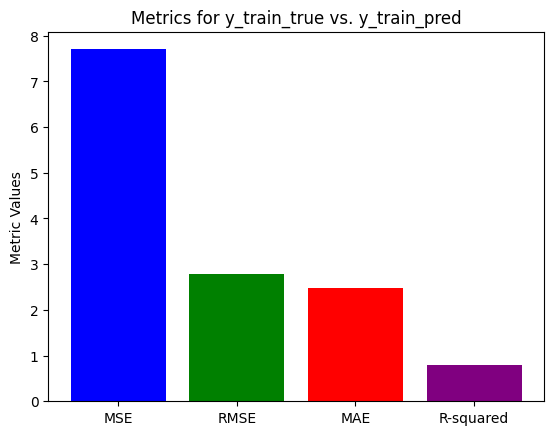

In [ ]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R-squared']
metrics_values = [mse_test, rmse_test, mae_test, r2_like_test]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Metric Values')
plt.title('Metrics for y_train_true vs. y_train_pred')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training, testing, and validation sets
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):int(len(df) * 0.9)]
val_data = df[int(len(df) * 0.9):]

model = ARIMA(train_data['crop_flow_lb_s'], order=(4, 1, 2))  # Adjust p, d, q as needed
results = model.fit()

# Predict on training set
y_train_true = train_data['crop_flow_lb_s']
y_train_pred = results.fittedvalues
print(len(y_train_true), len(y_train_pred))

# Predict on test set
y_test_true = test_data['crop_flow_lb_s']
y_test_pred = results.predict(start=len(train_data), end=int(len(df)*0.9)-1, typ='levels')
print(len(y_test_true), len(y_test_pred))

# Calculate MSE, RMSE, MAE, R-squared, and AIC for test set
mse_test = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
r2_test = 1 - (mse_test / np.var(y_test_true))
aic = results.aic
residuals = train_data['crop_flow_lb_s'] - results.fittedvalues
mean_y = np.mean(train_data['crop_flow_lb_s'])
tss = np.sum((train_data['crop_flow_lb_s'] - mean_y) ** 2)
rss = np.sum(residuals ** 2)
r2_like = 1 - (rss / tss)
print(f'R-squared-like Metric: {r2_like}')

# Display the results
print(f'Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, Test R-squared: {r2_test}, R-squared-like Metric: {r2_like}, AIC: {aic}')


280356 280356
35044 35044
R-squared-like Metric: 0.7859492628619056
Test MSE: 3.130232875626139, RMSE: 1.7692464146144649, MAE: 1.4218727742058608, Test R-squared: -0.10966121936326934, R-squared-like Metric: 0.7859492628619056, AIC: 1214712.971197481


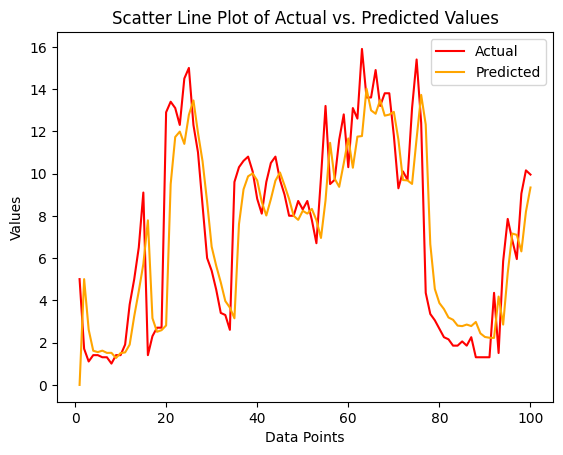

In [ ]:
plt.plot(range(1, len(y_train_true[:100]) + 1), y_train_true[:100], label='Actual', color='red')
plt.plot(range(1, len(y_train_pred[:100]) + 1), y_train_pred[:100], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Scatter Line Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
stepwise_fit = auto_arima(df['crop_flow_lb_s'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=93.290, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=89.405, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=87.973, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=88.595, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=87.517, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=89.290, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.067 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   74
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -42.758
Date:                Mon, 04 Dec 2023   AIC                             87.517
Time:                        20:27:58   BIC                             89.807
Sample:                    10-01-2005   HQIC                            88.429
                         - 11-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1889      0.013     14.423      0.000       0.163       0.215
===================================================================================
Ljung-Box (L1) (Q):                   2.75   Jarque-Bera (JB):               275.29
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""